# Learning "penalty"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 5 * X.squeeze() + np.random.randn(100) * 2  # y = 5x + noise

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Train Linear Regression (no regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

print("Linear Regression Coefficients:", lin_reg.coef_)

Linear Regression Coefficients: [14.32790398]


In [3]:
# Train Ridge Regression with different penalty values (lambda)
ridge_1 = Ridge(alpha=1)  # Small penalty
ridge_10 = Ridge(alpha=10)  # Medium penalty
ridge_100 = Ridge(alpha=100)  # Large penalty

ridge_1.fit(X_train_scaled, y_train)
ridge_10.fit(X_train_scaled, y_train)
ridge_100.fit(X_train_scaled, y_train)

print("Ridge Regression (α=1) Coefficients:", ridge_1.coef_)
print("Ridge Regression (α=10) Coefficients:", ridge_10.coef_)
print("Ridge Regression (α=100) Coefficients:", ridge_100.coef_)

Ridge Regression (α=1) Coefficients: [14.15101627]
Ridge Regression (α=10) Coefficients: [12.73591465]
Ridge Regression (α=100) Coefficients: [6.36795732]


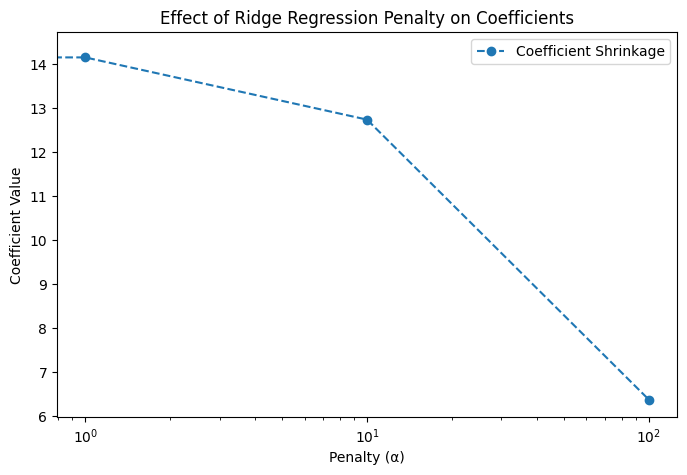

In [4]:
alphas = [0, 1, 10, 100]
coefs = [lin_reg.coef_[0], ridge_1.coef_[0], ridge_10.coef_[0], ridge_100.coef_[0]]

plt.figure(figsize=(8, 5))
plt.plot(alphas, coefs, marker='o', linestyle='--', label="Coefficient Shrinkage")
plt.xlabel("Penalty (α)")
plt.ylabel("Coefficient Value")
plt.xscale("log")  # Log scale for better visualization
plt.title("Effect of Ridge Regression Penalty on Coefficients")
plt.legend()
plt.show()

**Key Observations**  
- Linear Regression (α = 0): Coefficients are large and can lead to overfitting.
- Ridge Regression with Small α (α = 1): Coefficients shrink slightly, reducing variance.
- Ridge Regression with Medium α (α = 10): Coefficients shrink further, balancing bias and variance.
- Ridge Regression with Large α (α = 100): Coefficients are heavily penalized, leading to underfitting.
